In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)
%matplotlib inline

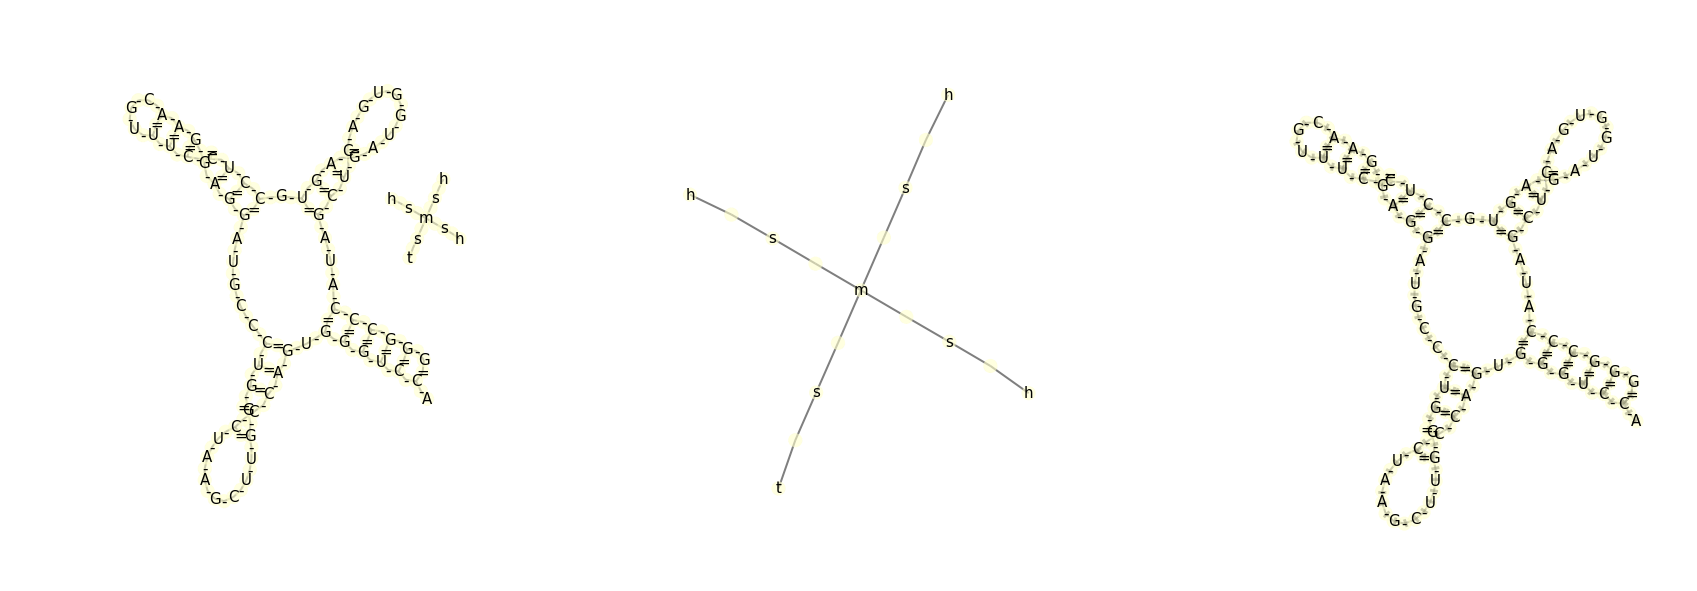

In [3]:
'''
first we need a graph delivery system. 
'''
from graphlearn.utils import draw
import graphlearn.abstract_graphs.graphmanager as graphman
from eden.graph import Vectorizer
vectorizer = Vectorizer()

graphman_iter = graphman.fromfasta('RF00005.fa',vectorizer)
graph_manager = graphman_iter.next()
graphlist=[graph_manager.get_estimateable(),graph_manager.get_abstract_graph(),graph_manager.get_base_graph()]
draw.graphlearn_draw(graphlist, size = 10,vertex_label = 'label',contract = False)


show RNA structure


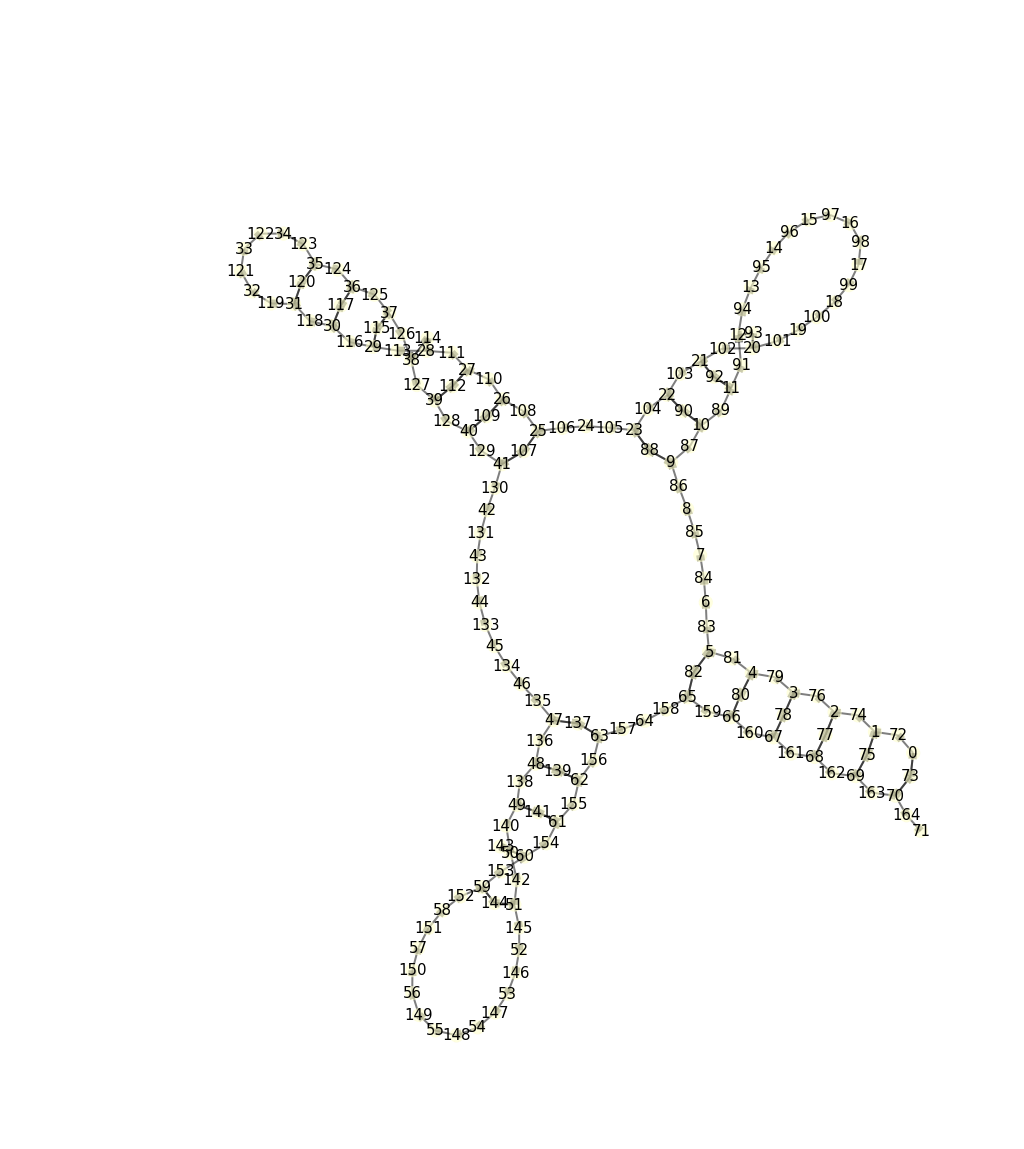

show abstract graph with associated nodes in the base graph


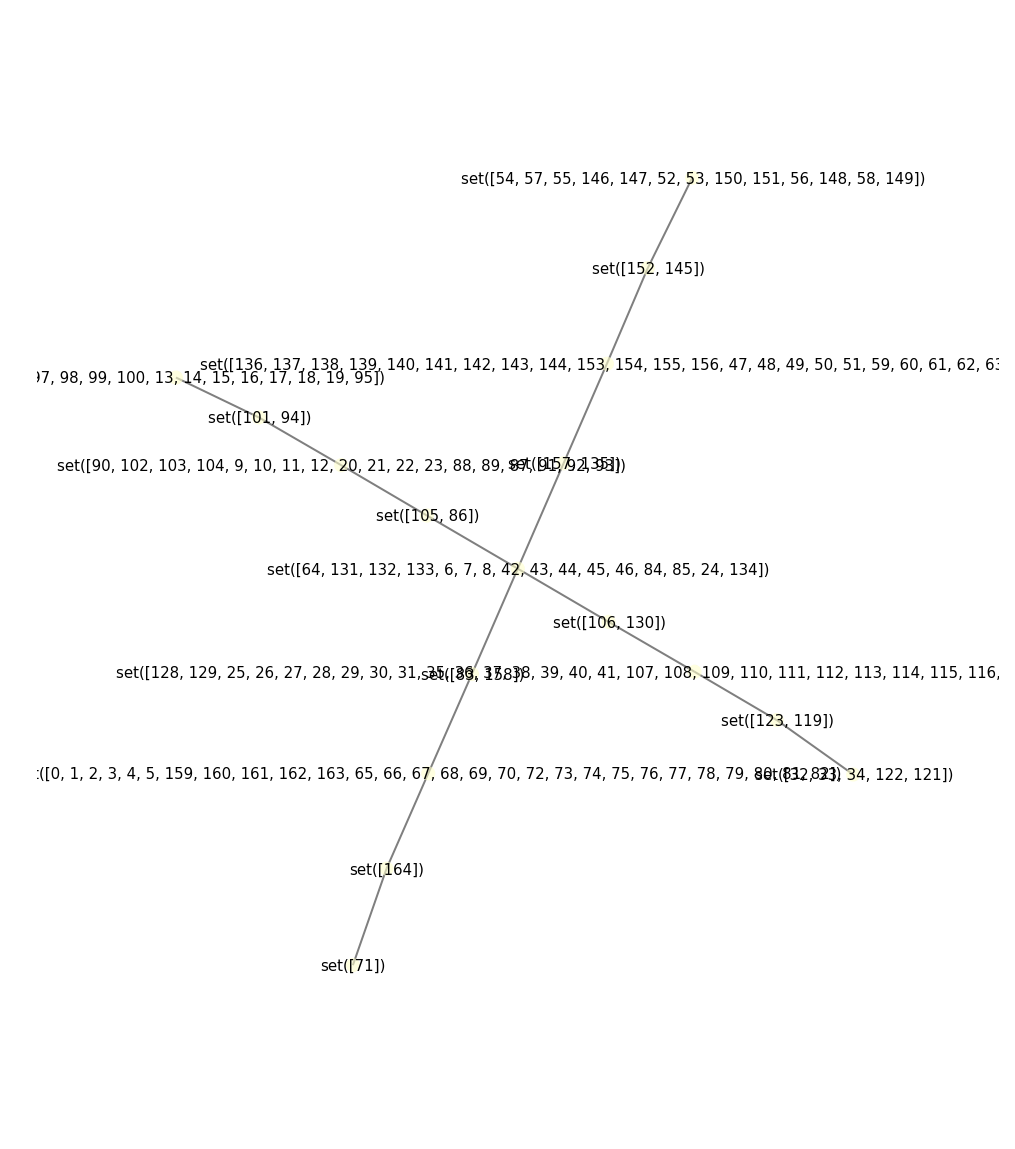

show some "cips", red nodes ~> "core", yellow ~> "interface"


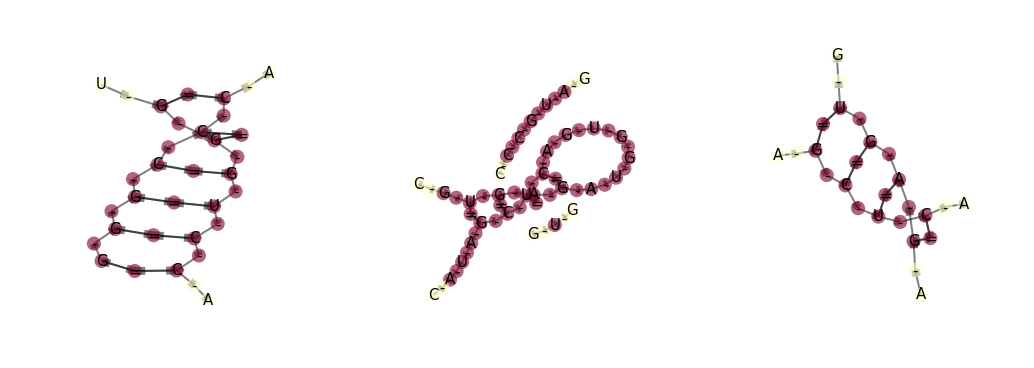

In [4]:
'''
graphlearn creates graphs given examples. 
for graphlearn to work we need to extract subgraphs of these examples that will be used later to construct new graphs.
I demonstrate this here.
'''
%matplotlib inline
import graphlearn.abstract_graphs.ubergraphlearn as ugly

print 'show RNA structure'
draw.graphlearn_draw(graph_manager.get_base_graph(),vertex_label='id',size=20)
print 'show abstract graph with associated nodes in the base graph'
draw.graphlearn_draw(graph_manager.get_abstract_graph(),vertex_label='contracted',size=20)


# prepare arguments to demonstracte the subgraph extraction
radius_list=[0,2]
thickness_list=[2,4]
base_thickness_list=[2]
args=(graph_manager,radius_list,thickness_list,Vectorizer(),2**20-1,lambda x,y:True, base_thickness_list)

# extract all subgraphs , note that the extraction is happening according to the abstract graph
cips=ugly.extract_cores_and_interfaces_mk2(args)

print 'show some "cips", red nodes ~> "core", yellow ~> "interface"'
draw.graphlearn_draw([cips[0][0].graph,cips[1][1].graph,cips[1][2].graph ], contract=False)


In [5]:
%%time
'''
preparing for sampling by 
1. training a SVM on the combination of abstract graph and base graph
2. extracting all the cips that are available in the input.
'''
import os 
os.nice(20)
%matplotlib inline

import graphlearn.abstract_graphs.rnasampler as rspl
import graphlearn.abstract_graphs.rnaabstract as rnaa
import itertools
import graphlearn.abstract_graphs.graphmanager as graphman

sampler=rspl.RNASampler(radius_list=[0,1],thickness_list=[1],base_thickness_list=[1], min_cip_count=1, min_interface_count=2, postprocessor=rnaa.ForgiPostprocessor())
graphs=graphman.fromfasta('RF00005.fa',sampler.vectorizer)
#graphs=itertools.islice(graphs,100)
sampler.fit(graphs,n_jobs=1,batch_size=1)
sampler.save('tmp/rna_ubergrammar.ge')


Classifier:
SGDClassifier(alpha=0.000569205995955, average=False, class_weight=None,
       epsilon=0.1, eta0=0.880643696134, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=47, n_jobs=1,
       penalty='elasticnet', power_t=1.02450353475, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
#instances: 648  #interfaces: 765   #cores: 7500   #core-interface-pairs: 8736
Saved model: tmp/rna_ubergrammar.ge
CPU times: user 6min 22s, sys: 18.5 s, total: 6min 41s
Wall time: 10min 52s


interface id: 158444 [305 options]


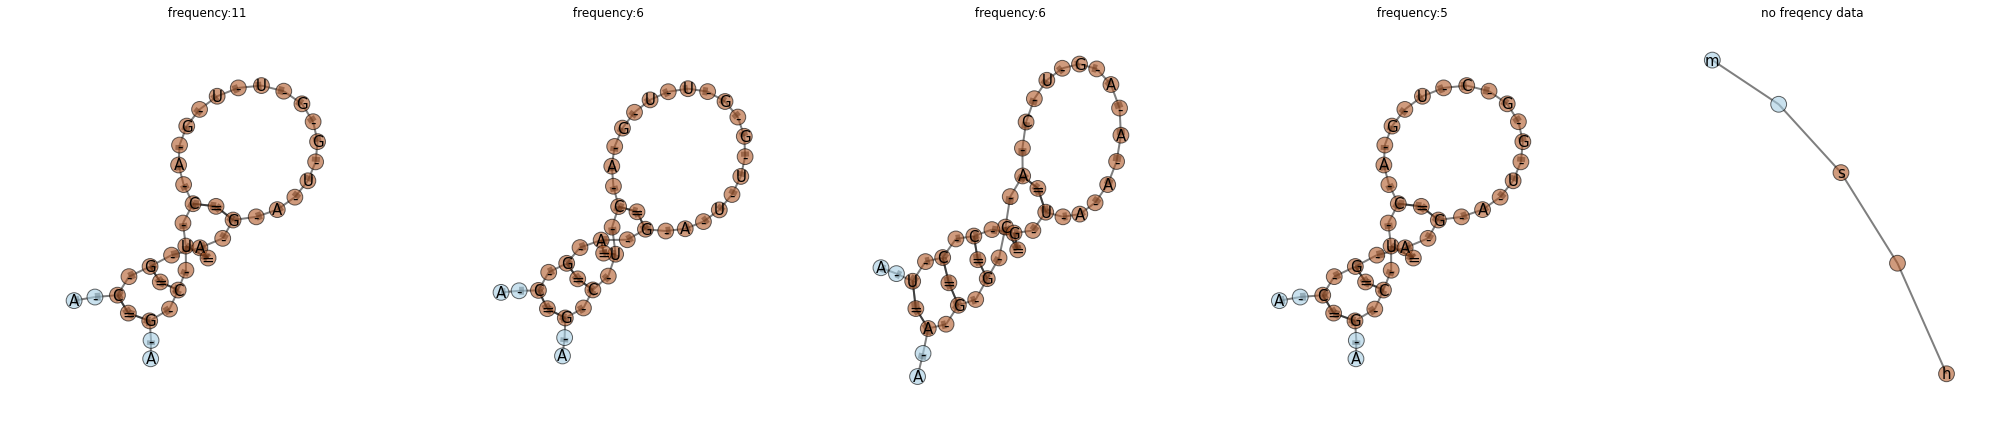

interface id: 508438 [284 options]


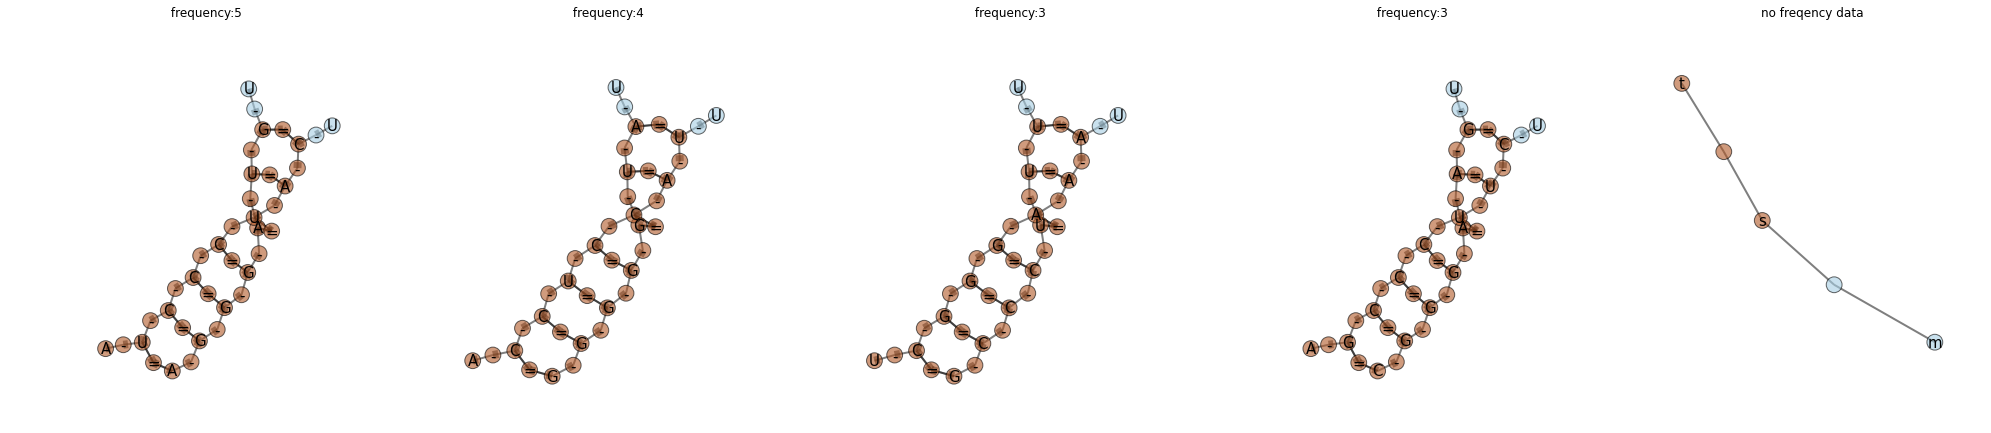

interface id: 895847 [231 options]


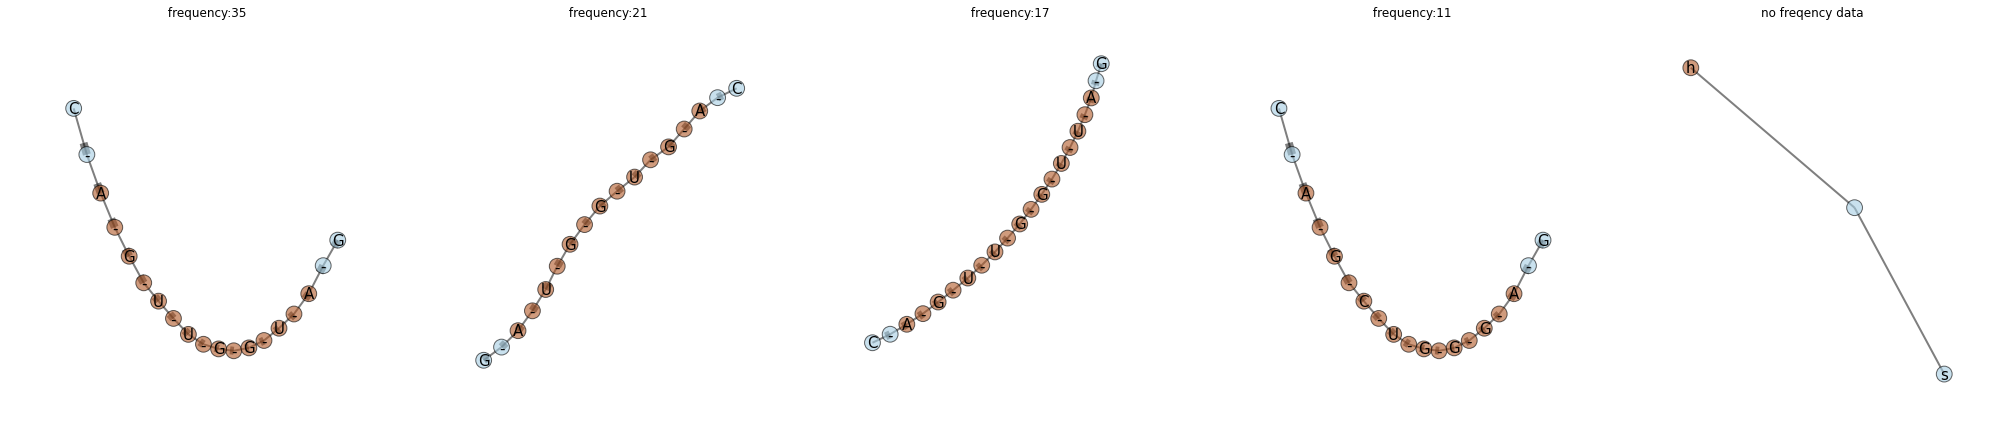

interface id: 829207 [223 options]


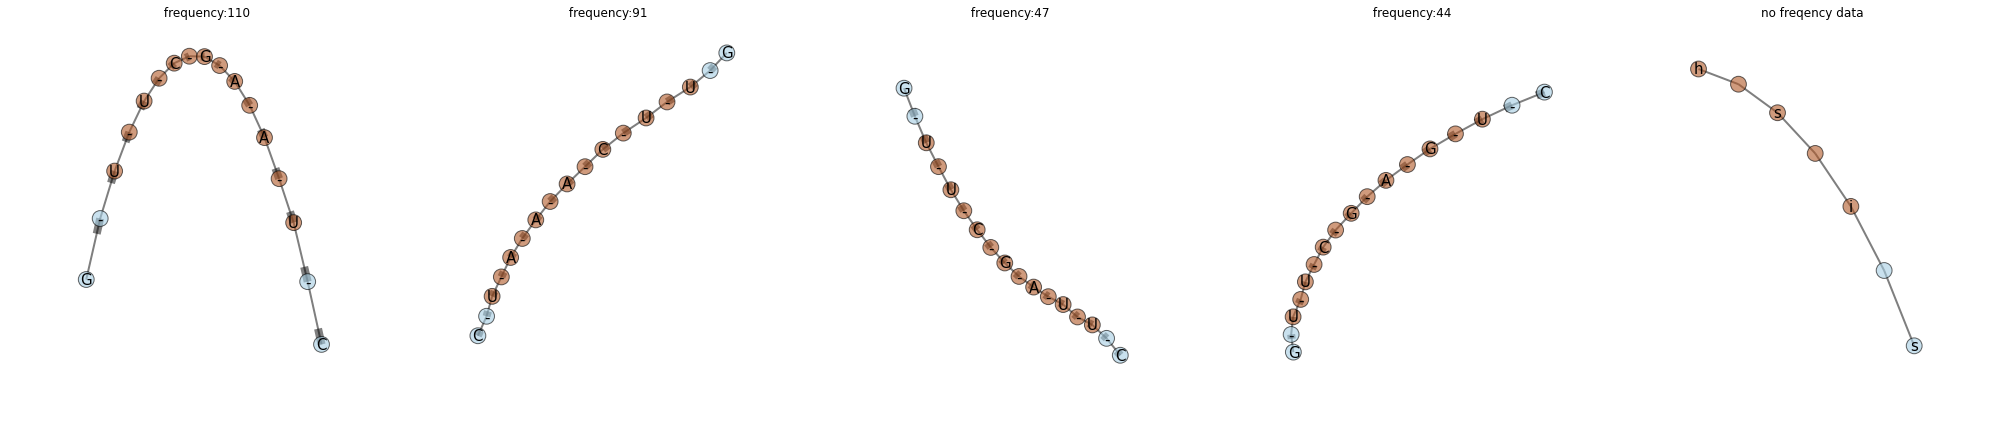

interface id: 782547 [218 options]


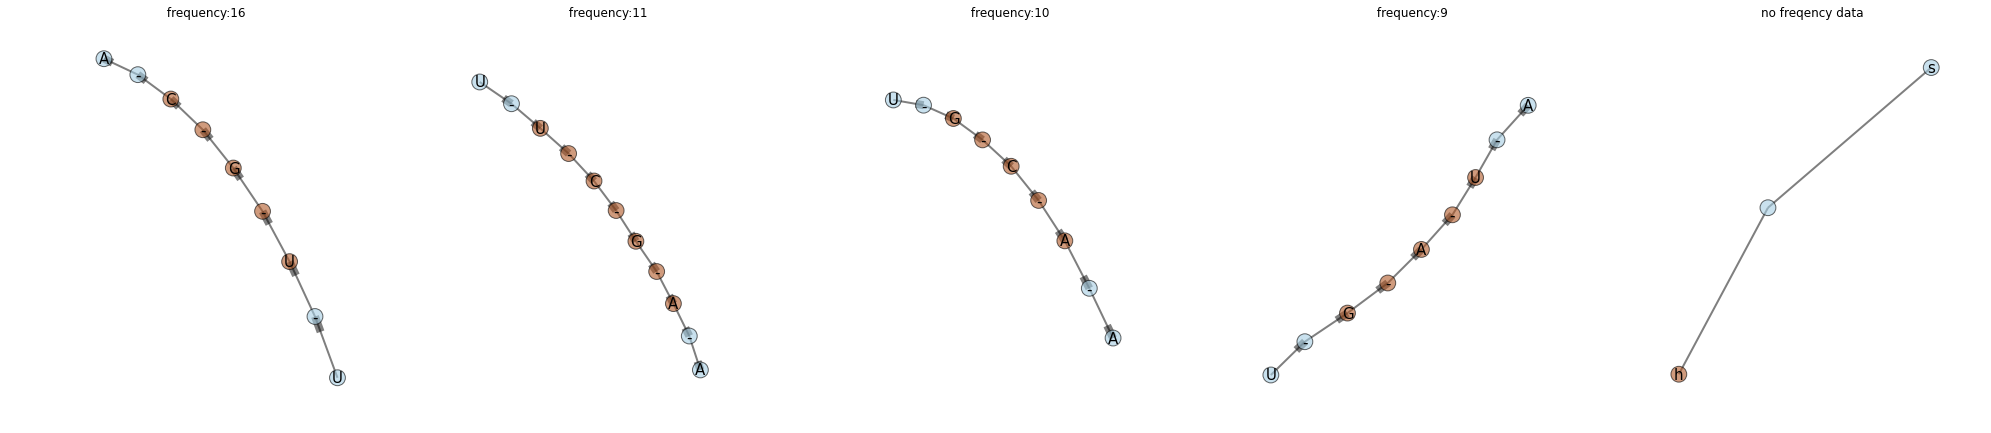

interface id: 772946 [213 options]


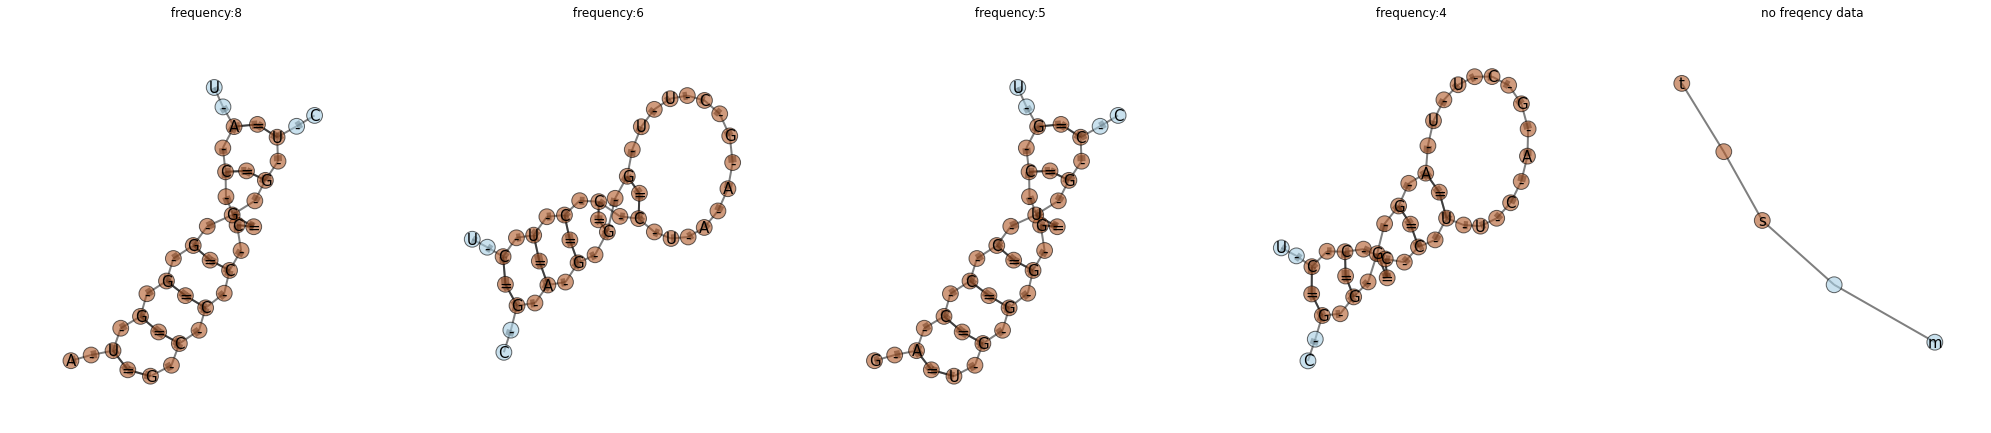

interface id: 768372 [165 options]


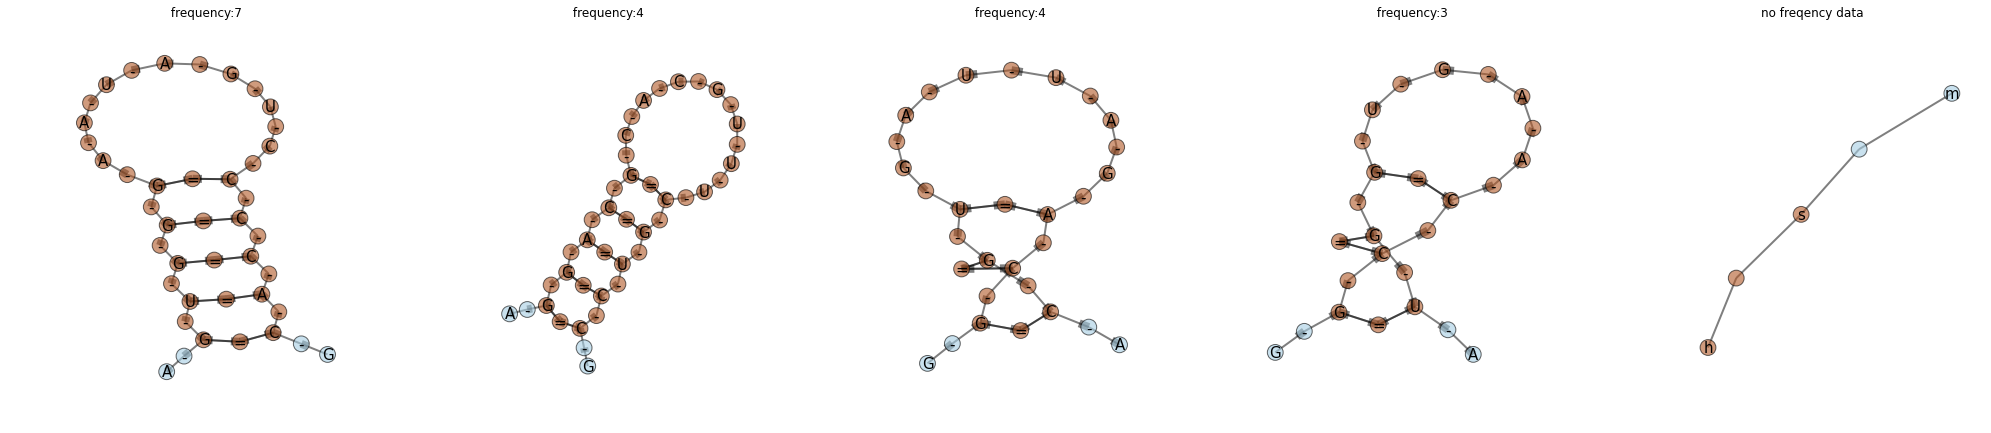

interface id: 1021485 [160 options]


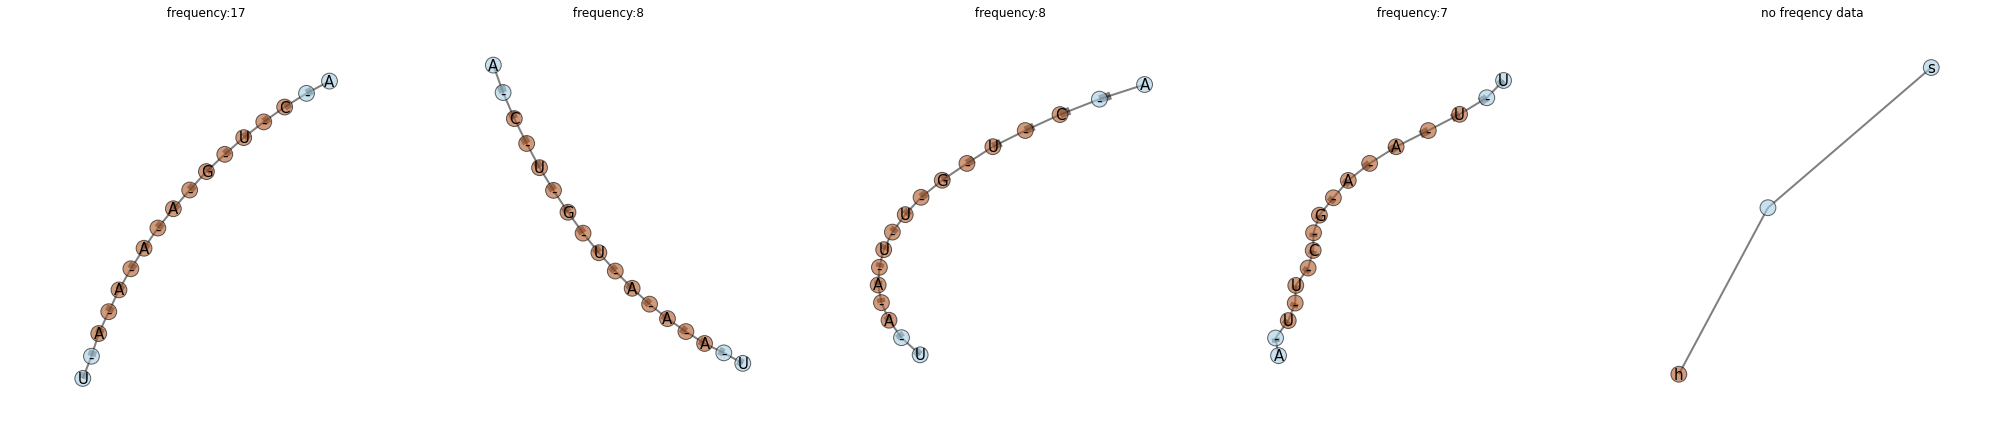

interface id: 150508 [151 options]


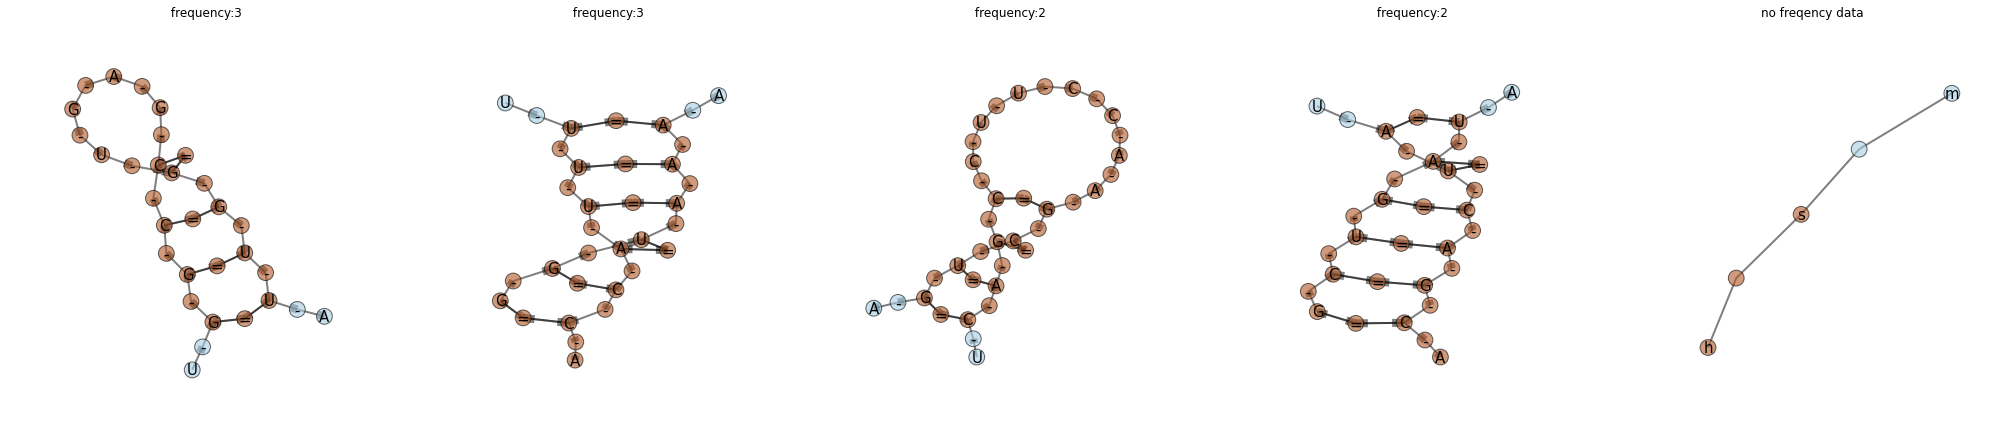

interface id: 429596 [143 options]


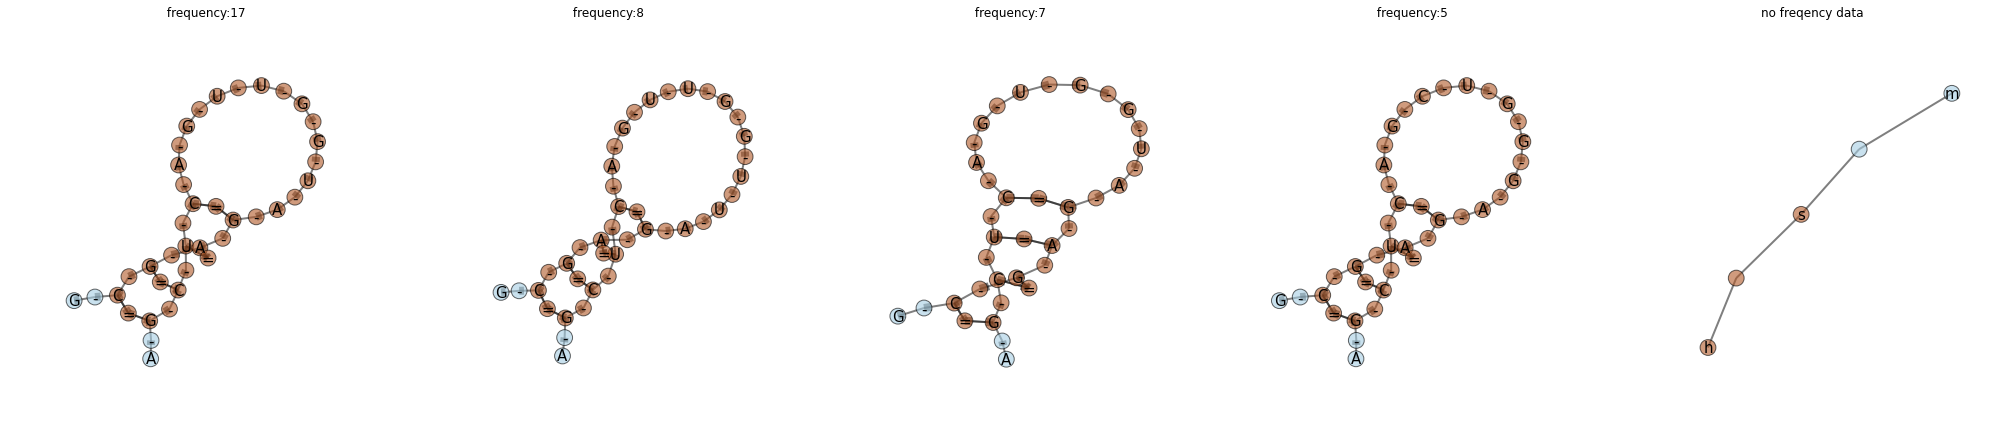

In [6]:
#draw production rules
import graphlearn.utils.draw as draw
draw.draw_grammar(sampler.lsgg.productions,n_productions=10,n_graphs_per_production=4,
                     n_graphs_per_line=6, size=7, contract=False,
                     colormap='Paired', invert_colormap=False,node_border=1,
                     vertex_alpha=0.6, edge_alpha=0.5, node_size=250)

# also note that the last graph in a row is not actually a cip.
# the cips dont show their interface in the abstract graph. 
# the last graph in each row is showing that abstract interface in blue. 


Loaded model: tmp/rna_ubergrammar.ge
preprocessing grammar
_sample_notes: None
accept_static_penalty: 0.0
base_thickness_list: [2]
batch_size: 1
    burnin: 0
complexity: 3
estimate_backflow: False
 estimator: CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.000569205995955, average=False, class_weight=None,
       epsilon=0.1, eta0=0.880643696134, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=47, n_jobs=1,
       penalty='elasticnet', power_t=1.02450353475, random_state=None,
       shuffle=True, verbose=0, warm_start=False),
            cv=2, method='sigmoid')
estimatorobject: <graphlearn.estimatorwrapper.EstimatorWrapper instance at 0x7f1c88113dd0>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f1c88113d40>
generator_mode: False
hash_bitmask: 1048575
improving_linear_start: 0
improving_penalty_per_step: 0.04
improving_threshold: 25
keep_duplicates: False
      lsgg: <graphlearn.abstract_graphs.uber

/home/ikea/.local/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/ikea/.local/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


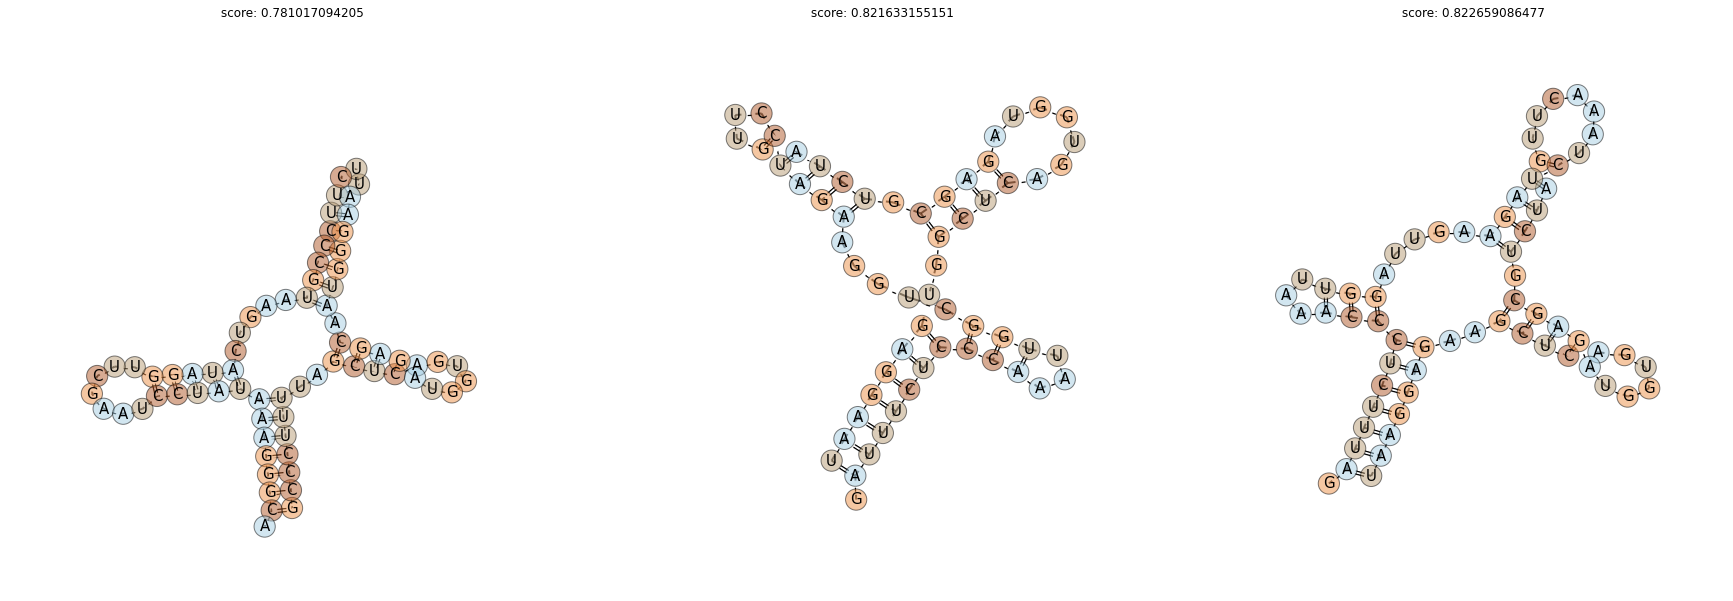

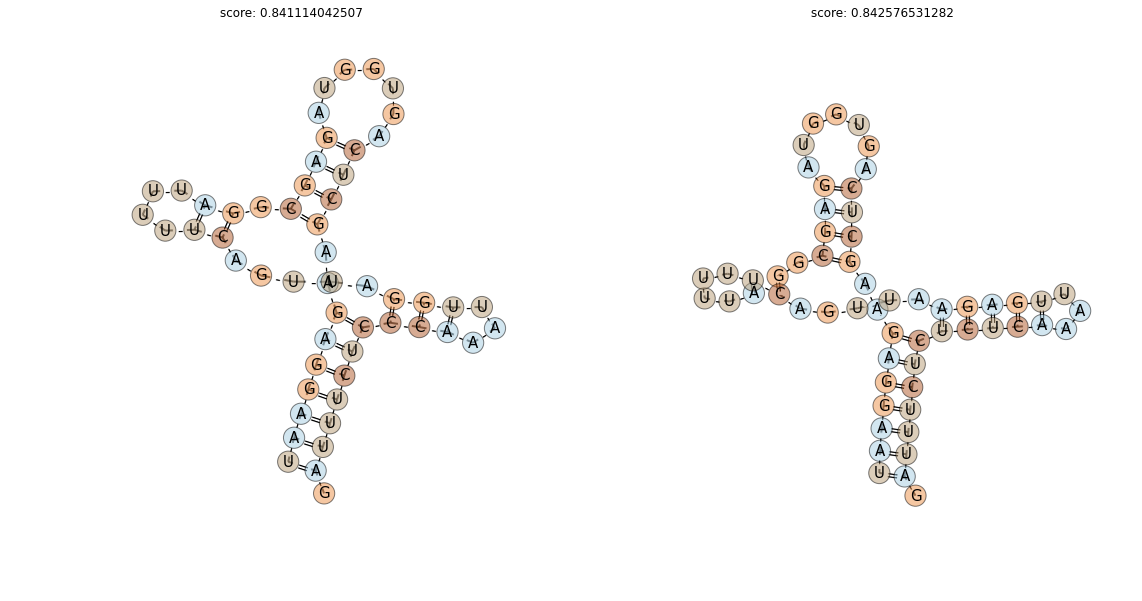

_propose_graph: iteration 0 ; core 0 of 31 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 222 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 9 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 222 ; original_cips tried  0
_propose_graph: iteration 5 ; core 0 of 79 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 12 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 8 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 12 ; original_cips tried  1
_propose_graph: iteration 9 ; core 0 of 230 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 14 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 38 ; original_cips tried  1
_propose_graph: iteration 12 ; core 0 of 230 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 14 ; original_cips tried  2
_propose_graph: iteration 14 ; core 0 of 28

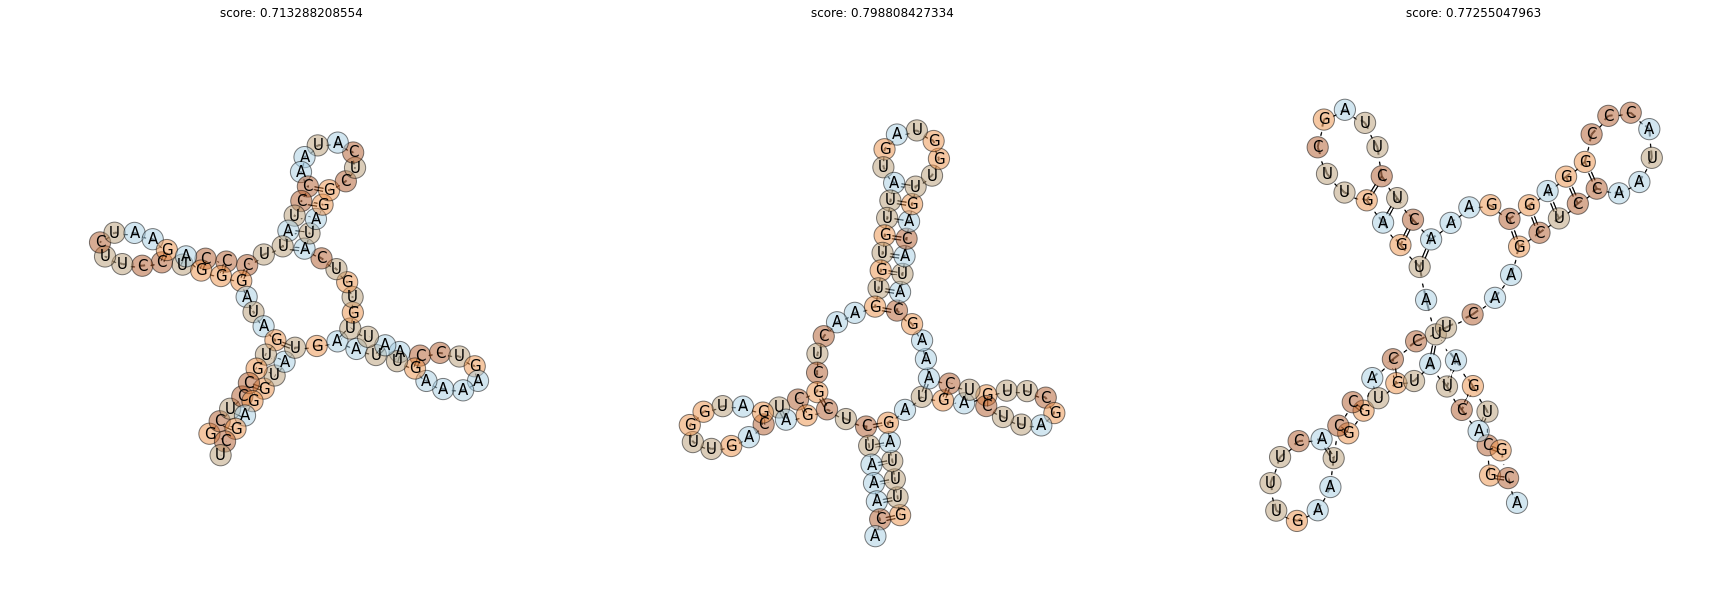

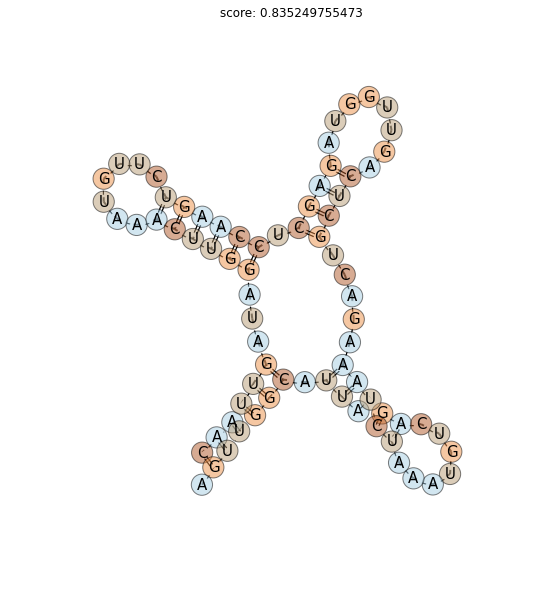

_propose_graph: iteration 0 ; core 0 of 4 ; original_cips tried  2
_propose_graph: iteration 1 ; core 0 of 10 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 15 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 10 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 212 ; original_cips tried  1
_propose_graph: iteration 5 ; core 0 of 9 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 222 ; original_cips tried  1
_propose_graph: iteration 7 ; core 0 of 110 ; original_cips tried  0
_propose_graph: iteration 8 ; core 0 of 9 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 9 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 222 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 58 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 32 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 9 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 49 ;

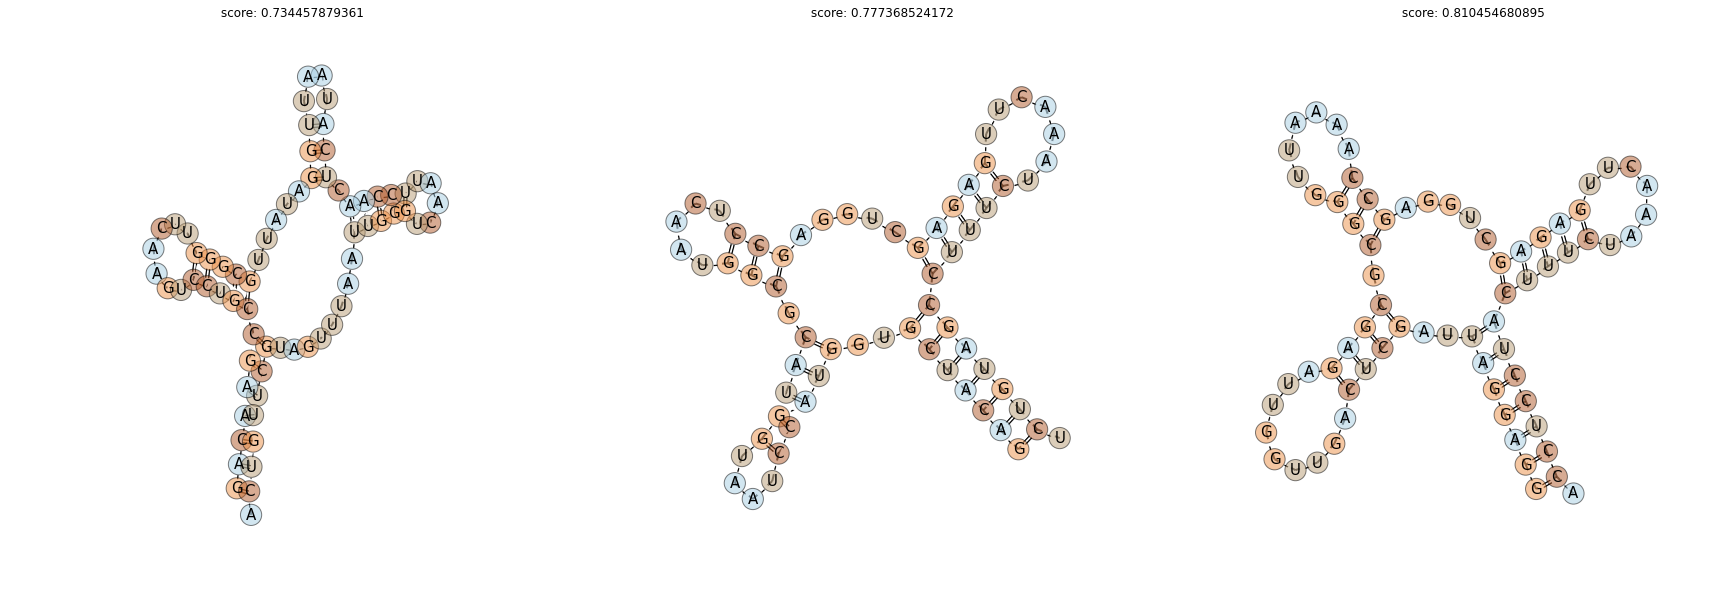

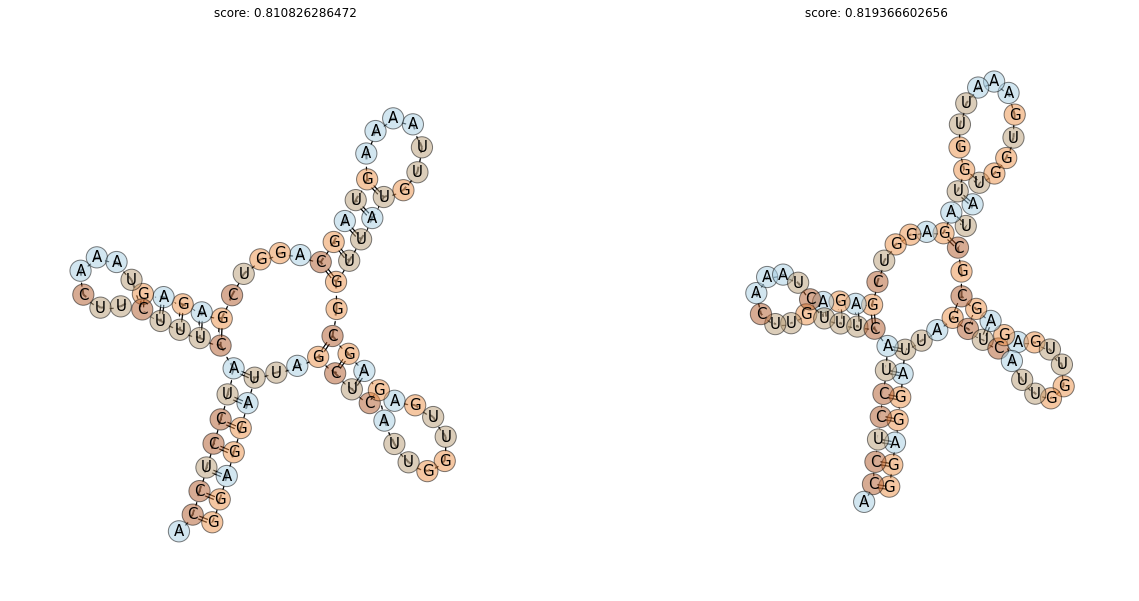

_sample_init failed, cant fold to trna
_sample_init failed, cant fold to trna
_propose_graph: iteration 0 ; core 0 of 17 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 45 ; original_cips tried  1
_propose_graph: iteration 2 ; core 0 of 45 ; original_cips tried  1
_propose_graph: iteration 3 ; core 0 of 104 ; original_cips tried  1
_propose_graph: iteration 4 ; core 0 of 212 ; original_cips tried  1
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 217 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 304 ; original_cips tried  1
_propose_graph: iteration 8 ; core 0 of 159 ; original_cips tried  1
_propose_graph: iteration 9 ; core 0 of 106 ; original_cips tried  0
_propose_graph: iteration 10 ; core 0 of 47 ; original_cips tried  0
_propose_graph: iteration 11 ; core 0 of 10 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 47 ; original_cips tried  1
_propose_graph: iteration 13 ;

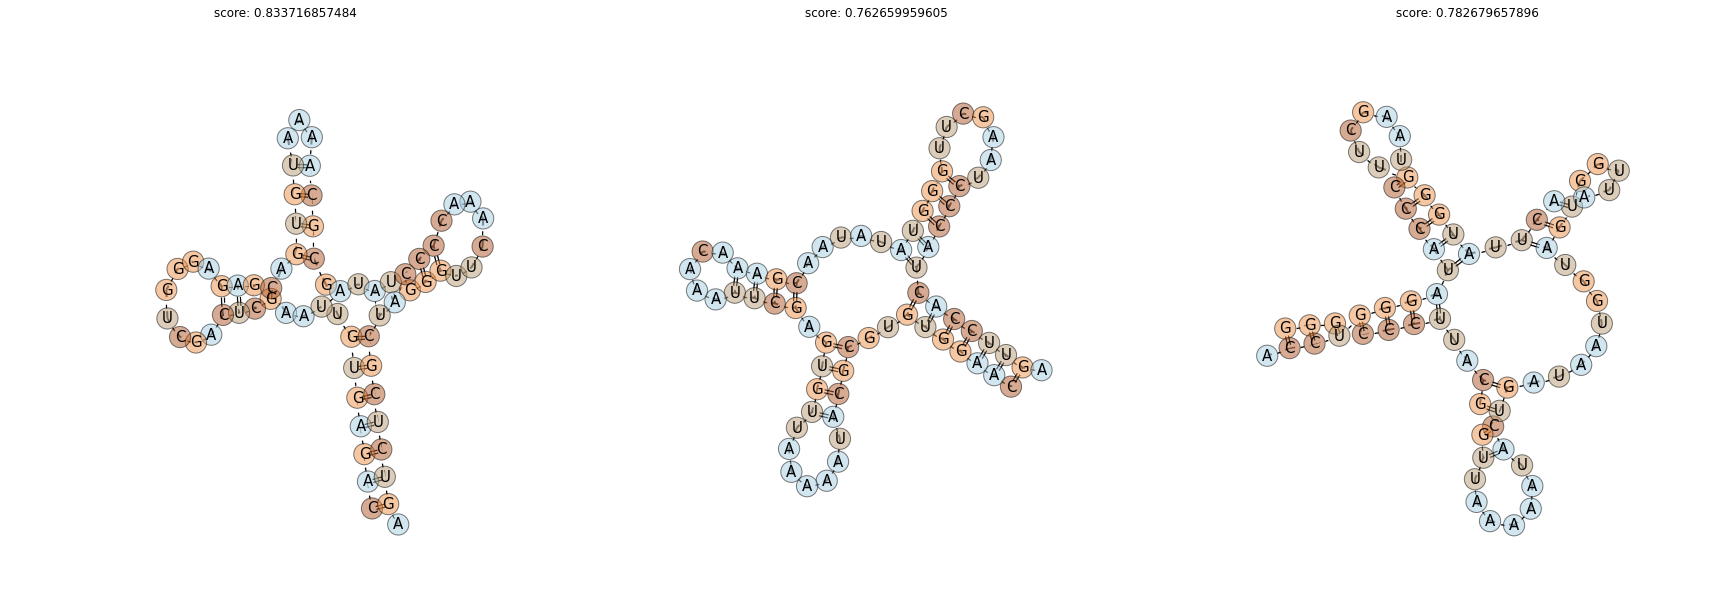

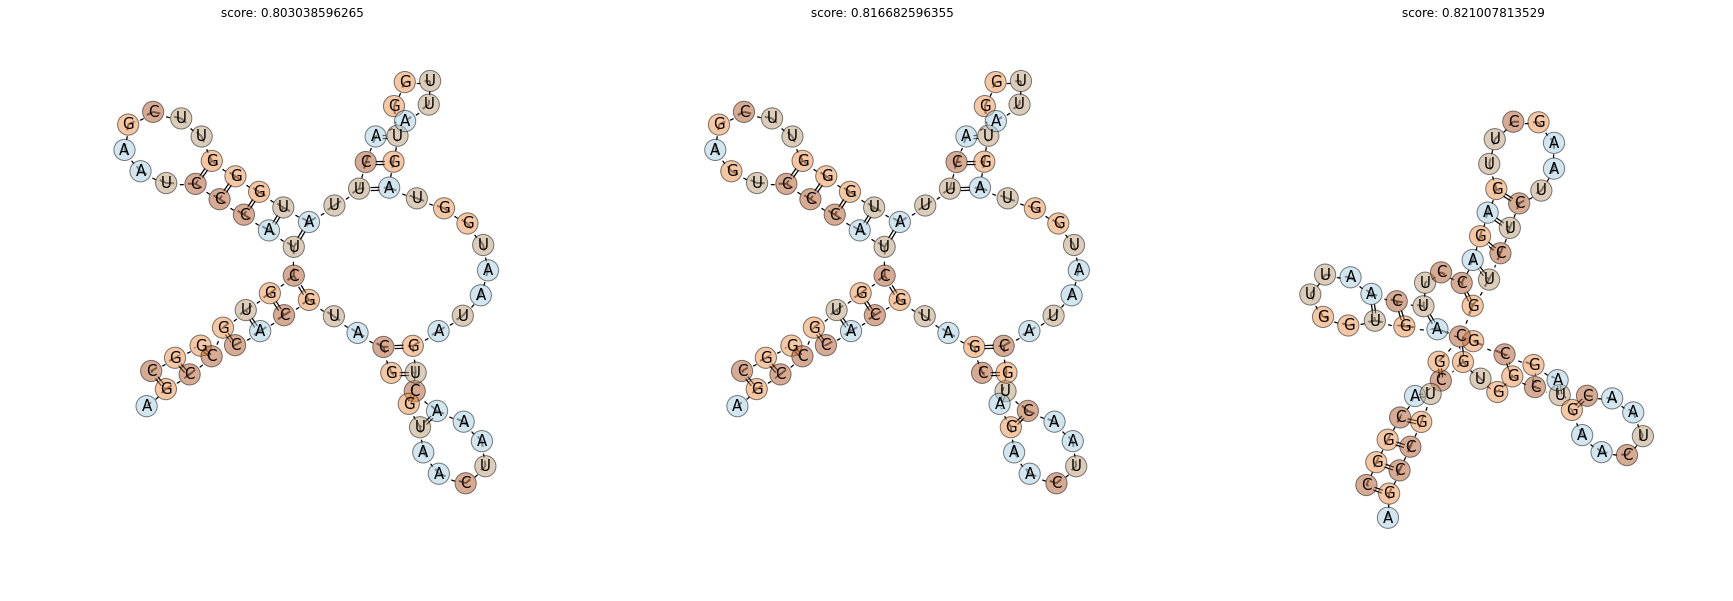

_propose_graph: iteration 0 ; core 0 of 4 ; original_cips tried  0
_propose_graph: iteration 1 ; core 0 of 110 ; original_cips tried  5
_propose_graph: iteration 2 ; core 0 of 22 ; original_cips tried  0
_propose_graph: iteration 3 ; core 0 of 222 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 110 ; original_cips tried  2
_propose_graph: iteration 5 ; core 0 of 4 ; original_cips tried  5
_propose_graph: iteration 6 ; core 0 of 222 ; original_cips tried  1
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  2
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 4 ; original_cips tried  1
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  1
_propose_graph: iteration 11 ; core 0 of 121 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 222 ; original_cips tried  1
_propose_graph: iteration 13 ; core 0 of 35 ; original_cips tried  1
_propose_graph: iteration 14 ; core 0 of 1 ;

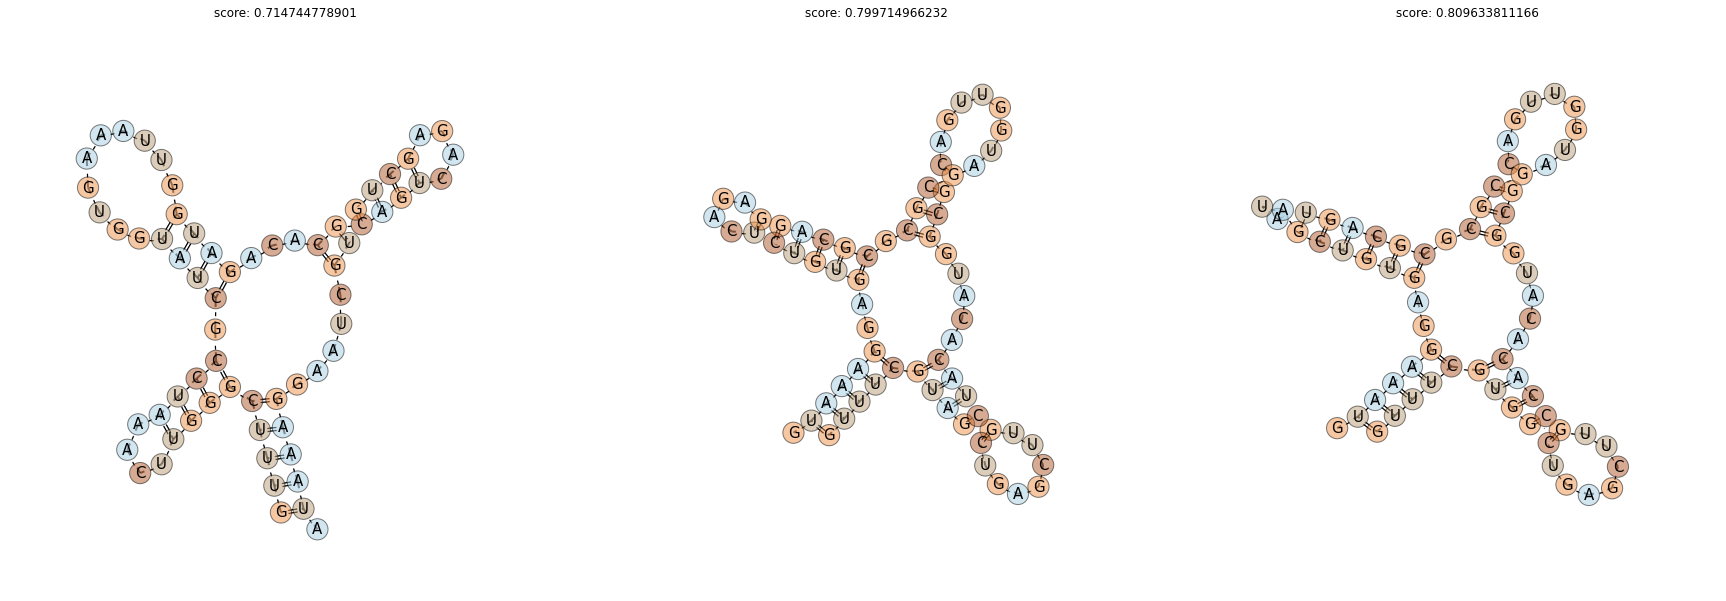

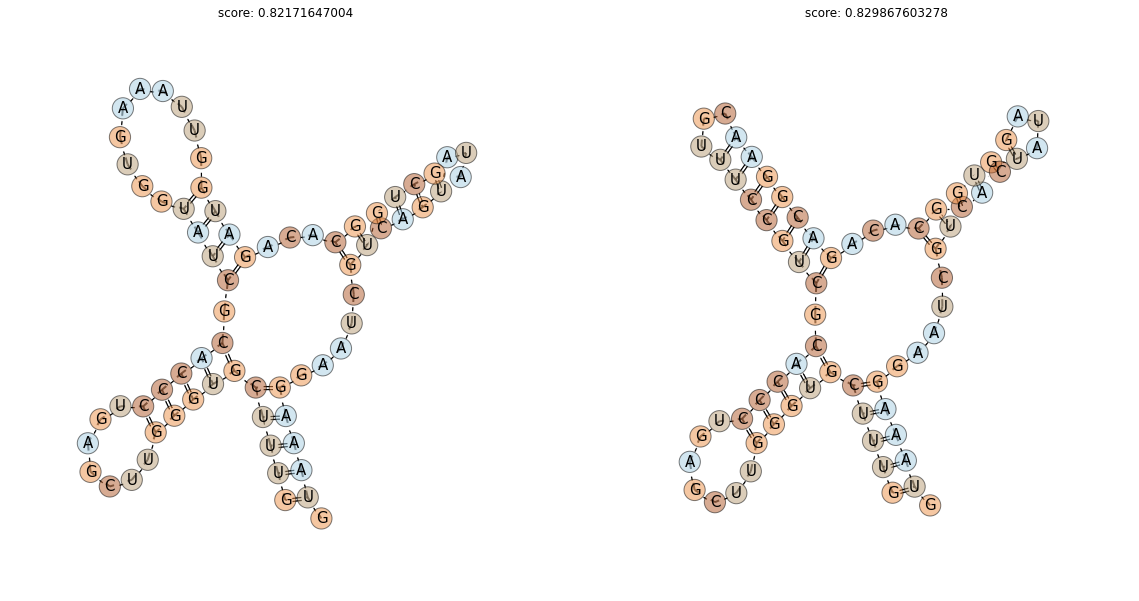

_propose_graph: iteration 0 ; core 0 of 30 ; original_cips tried  4
_propose_graph: iteration 1 ; core 0 of 159 ; original_cips tried  0
_propose_graph: iteration 2 ; core 0 of 4 ; original_cips tried  1
_propose_graph: iteration 3 ; core 0 of 4 ; original_cips tried  0
_propose_graph: iteration 4 ; core 0 of 21 ; original_cips tried  4
_propose_graph: iteration 5 ; core 0 of 222 ; original_cips tried  0
_propose_graph: iteration 6 ; core 0 of 217 ; original_cips tried  0
_propose_graph: iteration 7 ; core 0 of 9 ; original_cips tried  2
_propose_graph: iteration 8 ; core 0 of 9 ; original_cips tried  0
_propose_graph: iteration 9 ; core 0 of 217 ; original_cips tried  4
_propose_graph: iteration 10 ; core 0 of 15 ; original_cips tried  2
_propose_graph: iteration 11 ; core 0 of 21 ; original_cips tried  0
_propose_graph: iteration 12 ; core 0 of 31 ; original_cips tried  0
_propose_graph: iteration 13 ; core 0 of 164 ; original_cips tried  0
_propose_graph: iteration 14 ; core 0 of 11

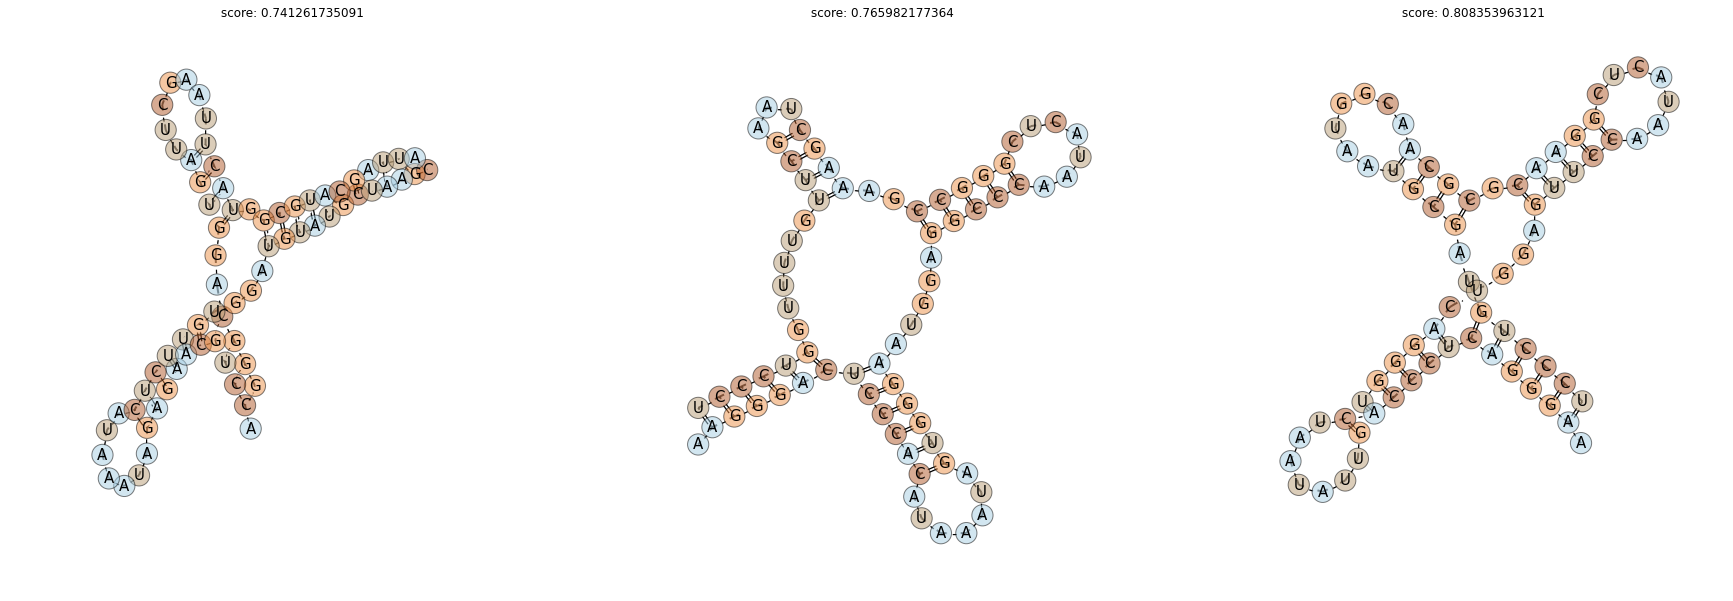

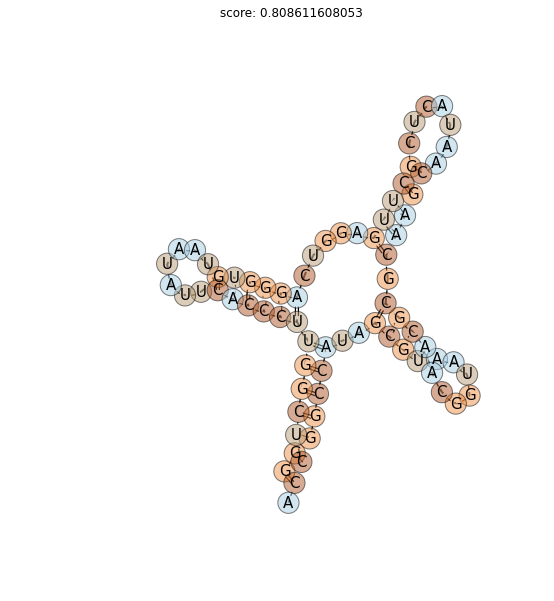

_sample_init failed, cant fold to trna
CPU times: user 1min 58s, sys: 28.7 s, total: 2min 26s
Wall time: 4min 20s


In [7]:
%%time
'''
RNA sampling

sampling works by taking input graphs, selecting a cip and see if we find a matching interface in 
the ciplist we created earlier. if we do, we can exchance the "core" part and see if the SVM likes 
what we created.
'''
import os
os.nice(19)
import graphlearn.utils.draw as draw
import graphlearn.abstract_graphs.rnasampler as rspl
import itertools
import matplotlib.pyplot as plt

# load what we created earlier
sampler=rspl.RNASampler()
sampler.load('tmp/rna_ubergrammar.ge')

# get input iterator
def fasta(filename='RF00005.fa'):
    s=[]
    with open(filename) as f:
        for line in f:
            s.append(line)
    while s:
        seqname=s[0]
        seq=''
        for i,l in enumerate(s[1:]):
            if l[0] != '>':
                seq+=l.strip()
            else:
                break
        yield seq  # the seq name is available but i dont feel like using it
        s=s[i+1:]
fasta_iter = fasta()


#  select input
id_start=15
id_end=id_start+9
fasta_iter = itertools.islice(fasta_iter,id_start,id_end)
n_steps=50

# run sampling
graphs = sampler.sample(fasta_iter,
                        n_samples=6,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        quick_skip_orig_cip=True,
                        probabilistic_core_choice=True,
                        burnin=0,
                        improving_threshold=0.5,
                        select_cip_max_tries=200,
                        keep_duplicates=False)



# for all the output graphs, colorize and draw them , also save the score history of the sampling process
from eden.modifier.graph.vertex_attributes import colorize   
scores=[]
sequences=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    sequences.append(graph.graph['sampling_info']['notes'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    path_graphs = colorize(path_graphs,
                           output_attribute = 'color_level', 
                           labels = ['A','U','G','C'])
    path_graphs= list(path_graphs)
    draw.graphlearn_draw(path_graphs,
                           n_graphs_per_line=3, size=10, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.7, node_size=450,edge_label='label',
                          headlinehook= draw.get_score_of_graph
                          )
    
    

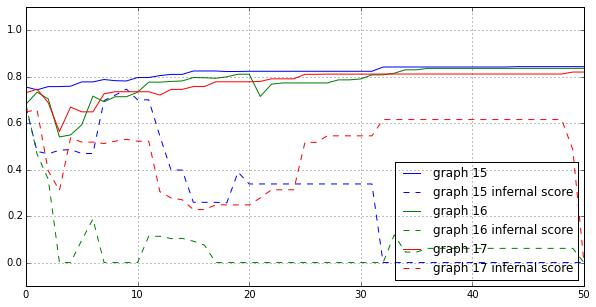

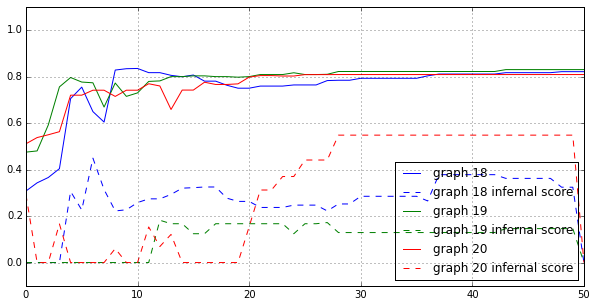

In [8]:
'''
draw the score history for each of the graphs
'''
colors=['b','g','r','c','m','y','k','w']

%matplotlib inline
from itertools import islice
import numpy as np
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data,ls='-',color=colors[j], label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        
        # okok now we need to add the infernal evaluation
        seqs=sequences[i*num_graphs_per_plot+j]
        seqs=seqs.split('n')
        #print seqs
        data2= rspl.infernal_checker(seqs)
        #print data2,seqs
        plt.plot(data2,ls='--',color=colors[j], label='graph %d infernal score'%(j+i*num_graphs_per_plot+id_start))
    
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

In [9]:
print data2

[0.292, 0, 0, 0.166, 0, 0, 0, 0, 0.06, 0, 0, 0.153, 0.069, 0.121, 0, 0, 0, 0, 0, 0, 0.154, 0.312, 0.312, 0.37, 0.37, 0.441, 0.441, 0.441, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0.5479999999999999, 0]
